In [1]:
import ROOT
import fedrarootlogon

Welcome to JupyROOT 6.28/06
Load FEDRA libs


In [2]:
filepath="/eos/experiment/sndlhc/emulsionData/2022/emureco_Napoli/RUN3/b000044/trackfiles/rootfiles/57_1/cell_7_4/vertextree.root"

In [3]:

#ds = ROOT.EdbDisplay("test",-50000.,50000.,-50000.,50000.,-4000.,80000.))
ds = ROOT.EdbDisplay("test",-50000.,50000.,-50000.,50000.,-4000.,80000.)

In [4]:
vID = 65549

gAli = ROOT.EdbPVRec()
proc = ROOT.EdbDataProc()
scancond = ROOT.EdbScanCond()
gAli.SetScanCond(scancond)

vertexrec = ROOT.EdbVertexRec()
vertexrec.SetPVRec(gAli)
vertexrec.eDZmax=3000.
vertexrec.eProbMin=0.01
vertexrec.eImpMax=15.
vertexrec.eUseMom=False
vertexrec.eUseSegPar=True
vertexrec.eQualityMode=0

drawntracksfromvertex = ROOT.TObjArray()
drawnvertices = ROOT.TObjArray()
vertex = proc.GetVertexFromTree(vertexrec,filepath,vID)
ntracksfromvertex = vertex.N()
#adding tracks and vertices to list to be drawn (only one vertex in this case)
drawnvertices.Add(vertex)

for i in range(ntracksfromvertex):
   vertextrack = vertex.GetTrack(i)
   nseg = vertextrack.N()
   for iseg in range(nseg):
     segment = vertextrack.GetSegment(iseg)
     segment.SetDZ(300.)
   drawntracksfromvertex.Add(vertextrack)

EdbDataProc::ReadVtxTree: select 1 of 79701 vertices by cut vID==65549
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 30: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 29: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 28: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 26: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 25: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 23: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 22: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 21: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 20: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 19: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern with pid 18: creating new one!
EdbDataProc::ReadVertexTree: WARNING: no pattern 

In [5]:
%jsroot on
#c = ROOT.TCanvas()
ds.SetArrV( drawnvertices)
ds.SetDrawTracks(4)
ds.SetArrTr( drawntracksfromvertex)



In [6]:
ds.GuessRange()

Guess Range:
X:   149761.9   154251.1
Y:    36061.5    41003.9
Z:   -42985.0     1000.0


In [7]:
#ds.SetView(180,0,90) #front view
ds.SetView(180,90,90) #side view
#ds.SetView(90,90,90) # top view
ds.Draw()
drawncanvas = ds.fCanvas

7 tracks to draw...
1 vertices to draw...
EdbDisplay::VertexDraw: id=65549  7-prong  flag = 3
7 tracks to draw...
1 vertices to draw...
EdbDisplay::VertexDraw: id=65549  7-prong  flag = 3


In [8]:
drawncanvas.SaveAs("comparisonvertex_side.png")

Info in <TCanvas::Print>: png file comparisonvertex_side.png has been created


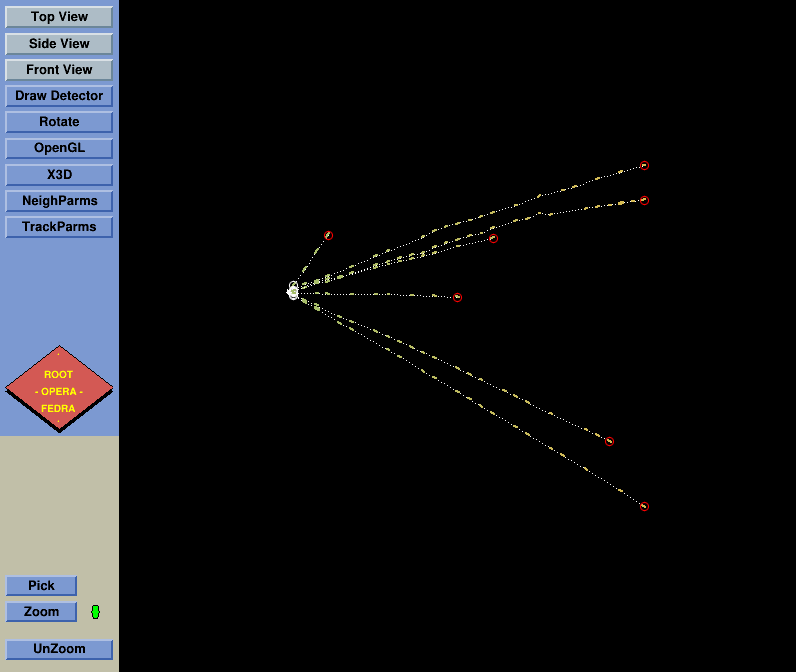

In [9]:
from IPython.display import Image, display
display(Image(filename='comparisonvertex_side.png'))
